In [17]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
file_path = "../data_set/diamonds.csv"
Diamonds = pd.read_csv(file_path)

dict = {
    "info": Diamonds.info(),
    "head": Diamonds.head(10),
    "dec": Diamonds.describe(include='all'),
    "col": Diamonds.columns,
    "index": Diamonds.index
}
dict

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


{'info': None,
 'head':    carat        cut color clarity  depth  table  price     x     y     z
 0   0.23      Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
 1   0.21    Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31
 2   0.23       Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31
 3   0.29    Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63
 4   0.31       Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75
 5   0.24  Very Good     J    VVS2   62.8   57.0    336  3.94  3.96  2.48
 6   0.24  Very Good     I    VVS1   62.3   57.0    336  3.95  3.98  2.47
 7   0.26  Very Good     H     SI1   61.9   55.0    337  4.07  4.11  2.53
 8   0.22       Fair     E     VS2   65.1   61.0    337  3.87  3.78  2.49
 9   0.23  Very Good     H     VS1   59.4   61.0    338  4.00  4.05  2.39,
 'dec':                carat    cut  color clarity         depth         table  \
 count   53940.000000  53940  53940   53940  53940.000000  53940.000000   
 uniq

C:\Users\Kevin\AppData\Local\Temp\ipykernel_18192\3890346537.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='carat', y='price', data=Diamonds, hue=None , palette='viridis')


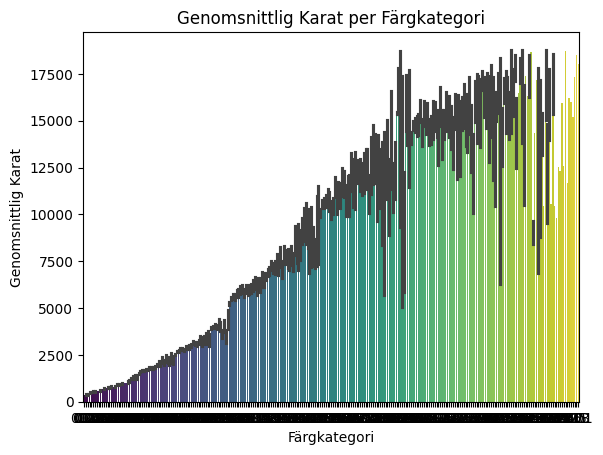

In [23]:
sns.barplot(x='carat', y='price', data=Diamonds, hue=None , palette='viridis')
plt.title('Genomsnittlig Karat per Färgkategori')
plt.xlabel('Färgkategori')
plt.ylabel('Genomsnittlig Karat')
plt.show()